In [1059]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import pickle
%matplotlib inline

In [979]:
df=pd.read_excel('Diabetes.xlsx')

In [980]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [981]:
df.shape

(768, 9)

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [983]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

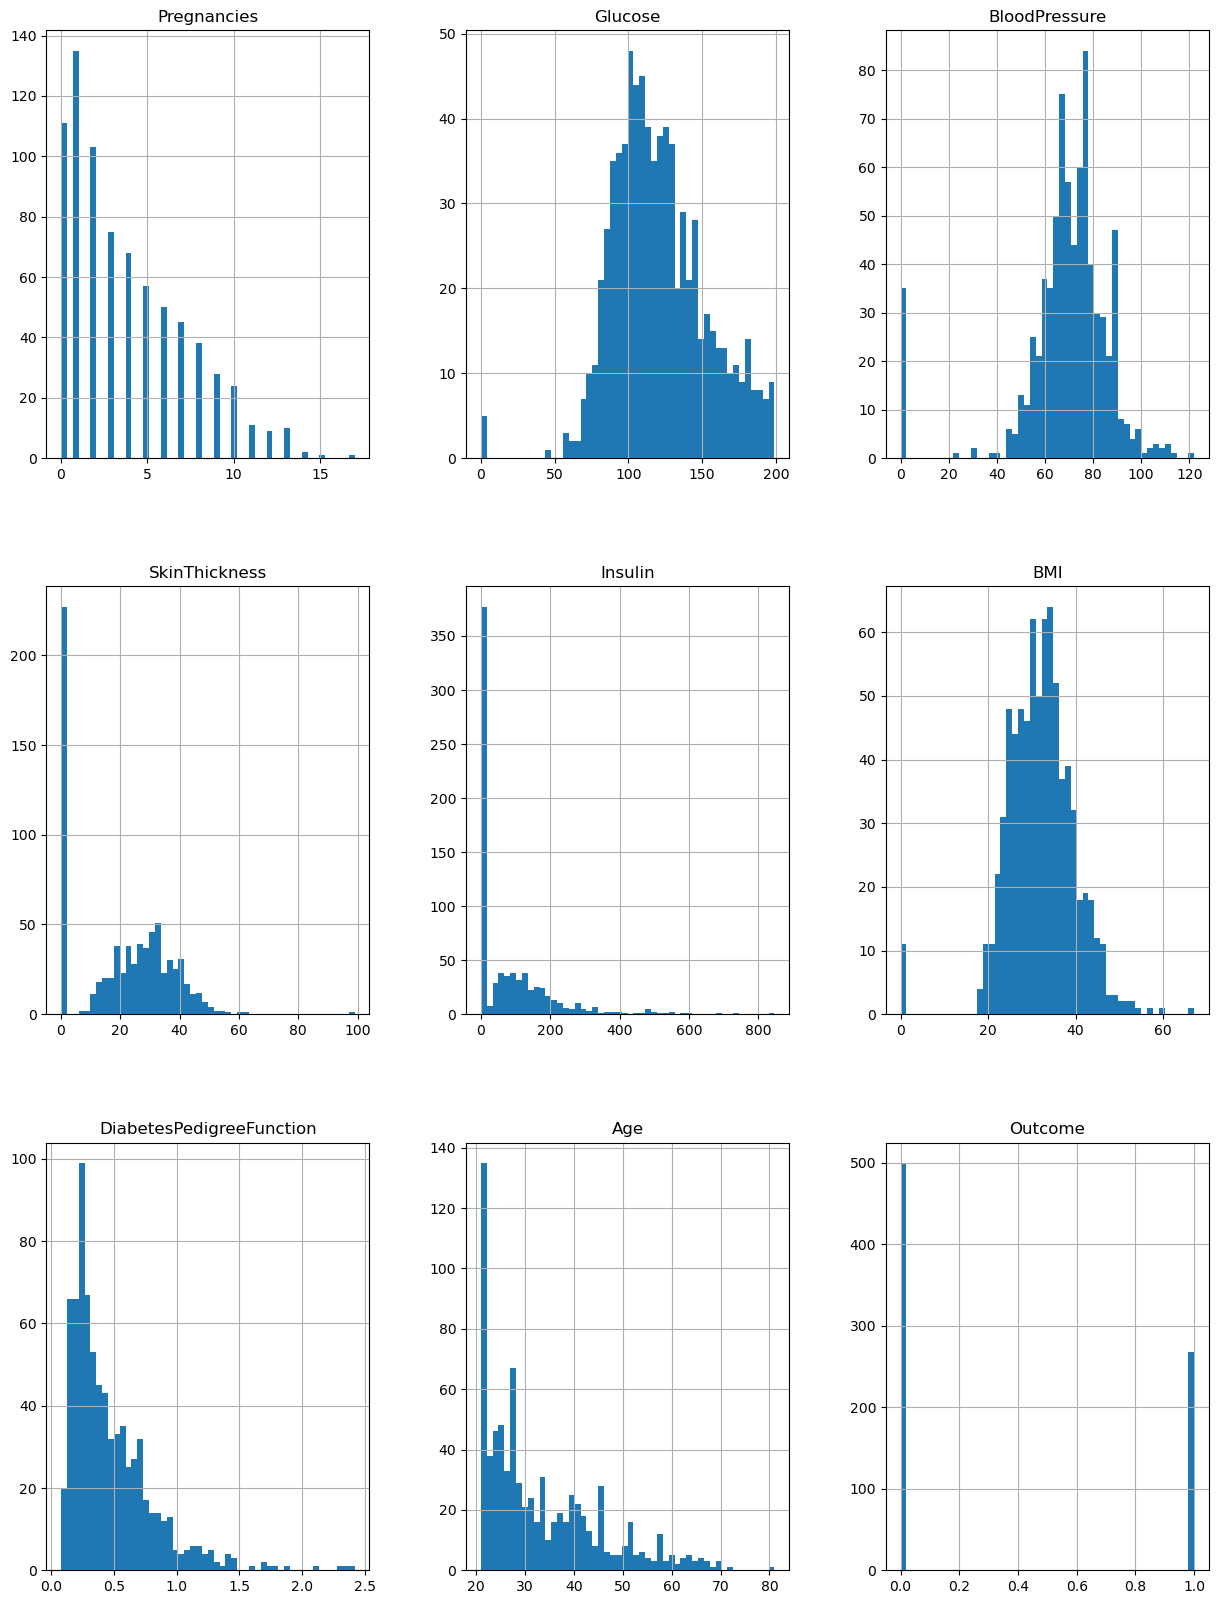

In [984]:
df.hist(bins=50, figsize=(15,20))

In [985]:
#dataset, not perfectly balanced
#bp,bmi,skin thickness of someone cannot be 0

In [986]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [988]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [989]:
df['BloodPressure'].value_counts().get(0,0)

35

In [990]:
df['BMI'].value_counts().get(0,0)

11

In [991]:
df['SkinThickness'].value_counts().get(0,0)

227

In [992]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [993]:
df1=df


In [994]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [995]:
#df1['BloodPressure']=pd.to_numeric(df1['BloodPressure']).astype('Int64')

In [996]:
#df1['BMI']=pd.to_numeric(df1['BMI'],errors='coerce').astype('float64')

In [997]:
#df1[60:62]
df1.drop(['SkinThickness'],axis=1,inplace=True)

In [998]:
bp_mean=df1['BloodPressure'].mean()


In [999]:
bmi_mean=df1['BMI'].mean()
bp_mean_int=int(bp_mean)

In [1000]:
df1['BloodPressure'].replace(0,bp_mean_int,inplace=True)
df1['BMI'].replace(0,bmi_mean,inplace=True)

In [1001]:
df1[df1['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [1002]:
df1[df1['BMI']==0]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [1003]:
df1.shape

(768, 8)

In [1004]:
df1.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [1005]:
df1['BloodPressure'].fillna(bp_mean_int,inplace=True)

In [1006]:
df1['BMI'].fillna(bmi_mean,inplace=True)

In [1007]:
df1['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)

In [1008]:
x=df1.drop(['Outcome'],axis=1)

In [1009]:
x[60:62]

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,69,79.799479,31.992578,0.304,21
61,8,133,72,79.799479,32.900000,0.270,39


In [1010]:
y=df1['Outcome']

In [1011]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [1012]:
train_x

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,69,79.799479,31.992578,0.304,21
618,9,112,82,79.799479,28.200000,1.282,50
346,1,139,46,83.000000,28.700000,0.654,22
294,0,161,50,79.799479,21.900000,0.254,65
231,6,134,80,370.000000,46.200000,0.238,46
...,...,...,...,...,...,...,...
71,5,139,64,140.000000,28.600000,0.411,26
106,1,96,122,79.799479,22.400000,0.207,27
270,10,101,86,79.799479,45.600000,1.136,38
435,0,141,69,79.799479,42.400000,0.205,29


In [1013]:
correlation_matrix=df.corr()

<Axes: >

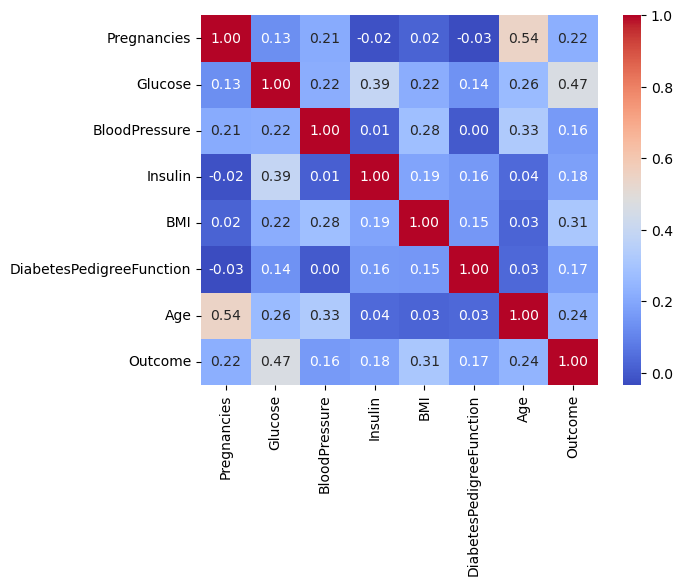

In [1014]:
sn.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")

In [1015]:
scaler=MinMaxScaler()

In [1016]:
scaler.fit_transform(train_x)

array([[0.11764706, 0.42211055, 0.45918367, ..., 0.28205681, 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.59183673, ..., 0.20449898, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.2244898 , ..., 0.21472393, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.63265306, ..., 0.5603272 , 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.45918367, ..., 0.49488753, 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.73469388, ..., 0.08793456, 0.07856533,
        0.        ]])

In [1017]:
scaler.transform(test_x)

array([[0.35294118, 0.49246231, 0.34693878, ..., 0.32310838, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.52040816, ..., 0.35787321, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.40816327, ..., 0.25766871, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.47738693, 0.48979592, ..., 0.3803681 , 0.17378309,
        0.6       ],
       [0.11764706, 0.73366834, 0.46938776, ..., 0.200409  , 0.11058924,
        0.13333333],
       [0.47058824, 0.3718593 , 0.46938776, ..., 0.34969325, 0.2677199 ,
        0.3       ]])

In [1018]:
#decision tree

In [1019]:
model1 =DecisionTreeClassifier()

In [1020]:
model1.fit(train_x,train_y)

DecisionTreeClassifier()

In [1021]:
predicted_y=model1.predict(test_x)

In [1022]:
accuracy=accuracy_score(predicted_y,test_y)

In [1023]:
accuracy

0.7532467532467533

In [1024]:
#knn

In [1025]:
list1=[]
for i in range(1,100):
    model2=KNeighborsClassifier(n_neighbors=i)
   
    model2.fit(train_x,train_y)
    predictd_y_2=model2.predict(test_x)
    accuracy_2=accuracy_score(predictd_y_2,test_y) 
    list1.append(accuracy_2)
list1

[0.6688311688311688,
 0.7012987012987013,
 0.6948051948051948,
 0.7337662337662337,
 0.7012987012987013,
 0.6883116883116883,
 0.6818181818181818,
 0.7077922077922078,
 0.6883116883116883,
 0.7142857142857143,
 0.7337662337662337,
 0.7272727272727273,
 0.7077922077922078,
 0.7337662337662337,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7142857142857143,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337662337,
 0.7402597402597403,
 0.7532467532467533,
 0.7532467532467533,
 0.7532467532467533,
 0.7597402597402597,
 0.7532467532467533,
 0.7337662337662337,
 0.7467532467532467,
 0.7207792207792207,
 0.7337662337662337,
 0.7337662337662337,
 0.7272727272727273,
 0.7272727272727273,
 0.7077922077922078,
 0.7207792207792207,
 0.7142857142857143,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337

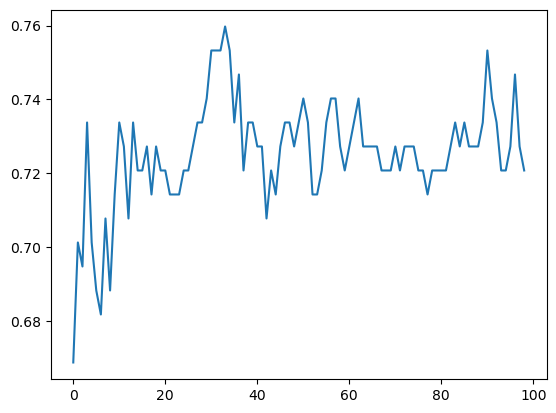

In [1026]:

plt.plot(list1)

In [1027]:
max(list1)

0.7597402597402597

In [1028]:
print(len(list1))


99


In [1029]:
for i in range(1,99):
    if list1[i]==0.7597402597402597:
        print(i)

33


In [1030]:
cross_val_score(model,train_x,train_y,scoring='accuracy',cv=5)

array([0.69918699, 0.67479675, 0.66666667, 0.71544715, 0.64754098])

In [1031]:
# k = 33 

In [1032]:
cross_val_score(model2,train_x,train_y,scoring='accuracy',cv=10)

array([0.69354839, 0.69354839, 0.77419355, 0.74193548, 0.75409836,
       0.78688525, 0.73770492, 0.70491803, 0.73770492, 0.68852459])

In [1033]:
f1score=f1_score(test_y,predicted_y,average="binary")

In [1034]:
f1score

0.6666666666666665

In [1035]:
parameters={
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2,10,15,20,25,50,100,150],
    'min_samples_leaf': [5,10,15,20]
}

In [1036]:
grid_search=GridSearchCV(estimator=model,param_grid=parameters,cv=5,scoring='accuracy',)

In [1037]:
grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [2, 10, 15, 20, 25, 50, 100,
                                               150]},
             scoring='accuracy')

In [1038]:
best_parameters=grid_search.best_params_

In [1039]:
best_parameters

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 100}

In [1040]:
best_model=grid_search.best_estimator_

In [1041]:
predicted_best_y=best_model.predict(test_x)

In [1042]:
acc=accuracy_score(predicted_best_y,test_y)

In [1043]:
acc

0.7792207792207793

In [1044]:
fig = plt.figure(figsize=(40,50))

<Figure size 4000x5000 with 0 Axes>

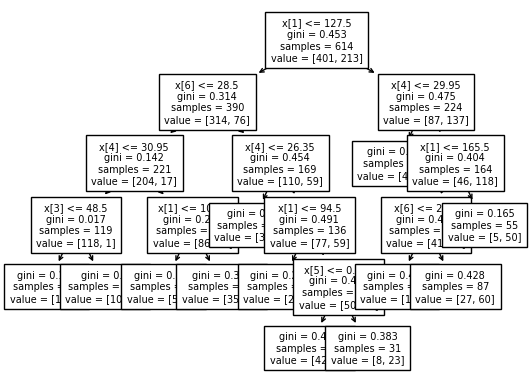

In [1045]:
tree.plot_tree(best_model,fontsize=7)
plt.show()

In [1046]:
#Random forest

In [1047]:
model_3=RandomForestClassifier(n_estimators=40)

In [1048]:
model_3.fit(train_x,train_y)

RandomForestClassifier(n_estimators=40)

In [1049]:
predicted_y_rf=model_3.predict(test_x)

In [1050]:
accuracy_3=accuracy_score(predicted_y_rf,test_y)

In [1051]:
accuracy_3

0.7727272727272727

In [1052]:
#logistic regression

In [1053]:
model4=LogisticRegression(max_iter=1050)

In [1054]:
model4.fit(train_x,train_y)

LogisticRegression(max_iter=1050)

In [1055]:
predicted_y_4=model4.predict(test_x)

In [1056]:
accuracy_4=accuracy_score(predicted_y_4,test_y)

In [1057]:
accuracy_4

0.7662337662337663

In [1058]:
list_model=['DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','LogisticRegression']
list2=[accuracy,accuracy_2,accuracy_3,accuracy_4]
for i in range(len(list2)): print(i,list_model[i],list2[i])

0 DecisionTreeClassifier 0.7532467532467533
1 KNeighborsClassifier 0.7207792207792207
2 RandomForestClassifier 0.7727272727272727
3 LogisticRegression 0.7662337662337663


FROM THE ABOVE INFORMATION WE CAN CONCLUDE THAT RANDOM FOREST IS GIVING THE BEST ACCURACY OF 77.27

In [1061]:
with open('model_3.pkl','wb') as best_model_selected:
    pickle.dump(model_3,best_model_selected)

In [1063]:
with open('model_3.pkl','rb') as best_model_selected:
    loaded_model=pickle.load(best_model_selected)


In [1067]:
loaded_model.predict([[1,	139,	46	,83.000000,	28.700000,	0.654,	22
]])

C:\Users\Afreen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)